In [1]:
#Imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Data load
df = pd.read_csv(r"D:\prepare\real_estate_data.csv")

In [3]:
#Target variable
target = "price"

In [4]:
#Encode categorical feature
df_encoded = pd.get_dummies(
    df,
    columns=["property_type"],
    drop_first=True
)

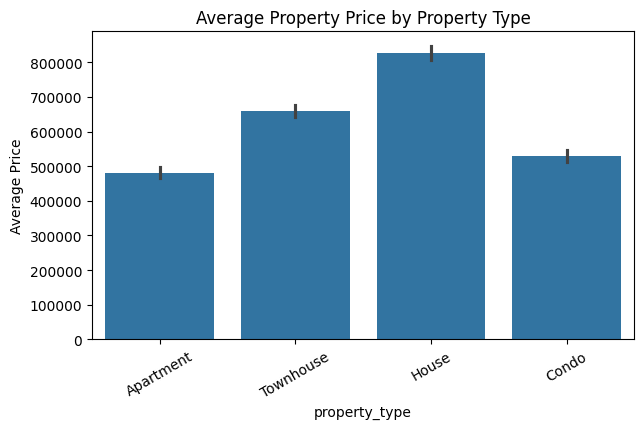

In [5]:
#Property type vs average price
plt.figure(figsize=(7,4))
sns.barplot(
    x="property_type",
    y="price",
    data=df,
    estimator=np.mean
)
plt.title("Average Property Price by Property Type")
plt.ylabel("Average Price")
plt.xticks(rotation=30)
plt.show()

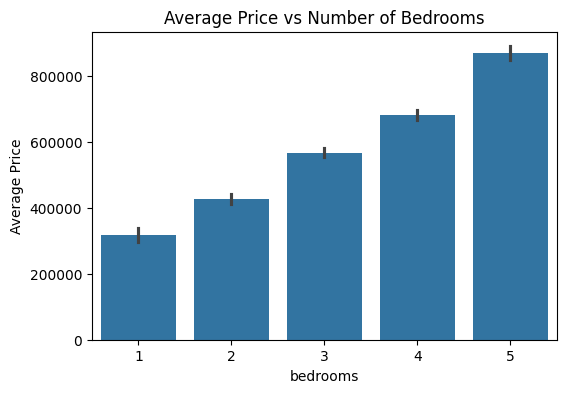

In [6]:
#Bedrooms vs average price
plt.figure(figsize=(6,4))
sns.barplot(
    x="bedrooms",
    y="price",
    data=df,
    estimator=np.mean
)
plt.title("Average Price vs Number of Bedrooms")
plt.ylabel("Average Price")
plt.show()

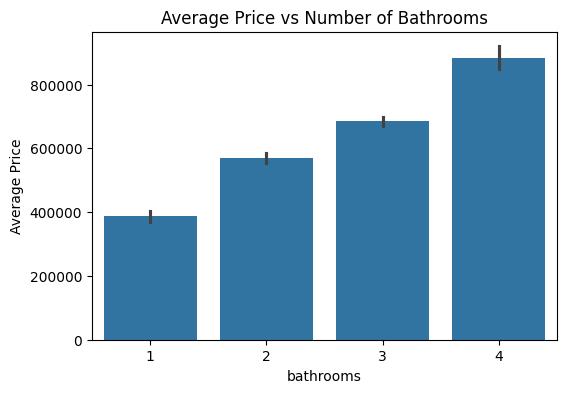

In [7]:
#Bathrooms vs average price
plt.figure(figsize=(6,4))
sns.barplot(
    x="bathrooms",
    y="price",
    data=df,
    estimator=np.mean
)
plt.title("Average Price vs Number of Bathrooms")
plt.ylabel("Average Price")
plt.show()

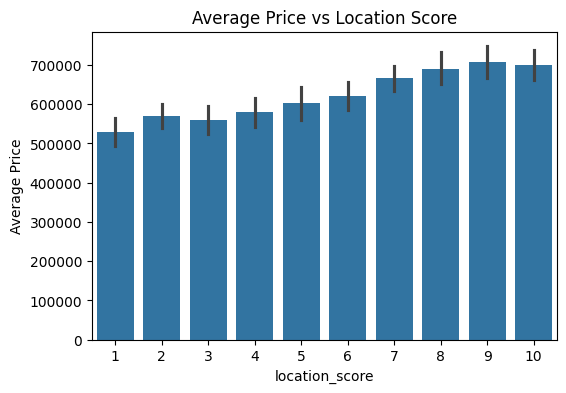

In [8]:
#Location score vs average price
plt.figure(figsize=(6,4))
sns.barplot(
    x="location_score",
    y="price",
    data=df,
    estimator=np.mean
)
plt.title("Average Price vs Location Score")
plt.ylabel("Average Price")
plt.show()

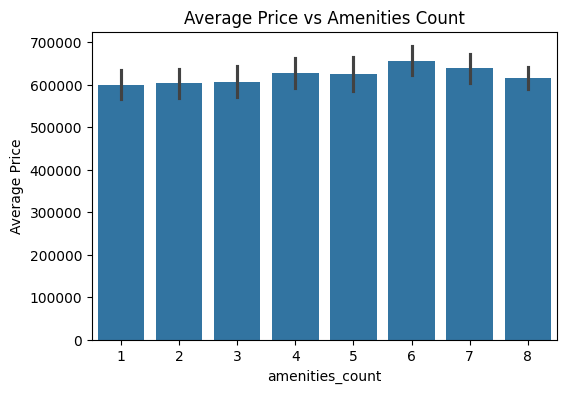

In [9]:
#Amenities count vs average price
plt.figure(figsize=(6,4))
sns.barplot(
    x="amenities_count",
    y="price",
    data=df,
    estimator=np.mean
)
plt.title("Average Price vs Amenities Count")
plt.ylabel("Average Price")
plt.show()

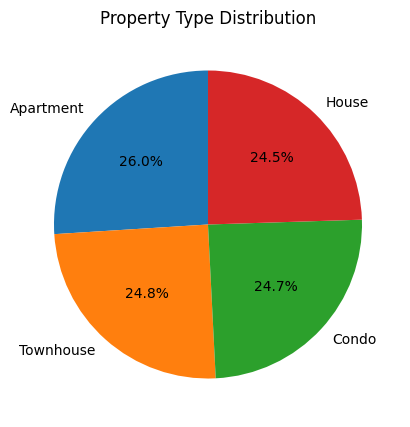

In [10]:
#Property type distribution
property_counts = df["property_type"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    property_counts,
    labels=property_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Property Type Distribution")
plt.show()

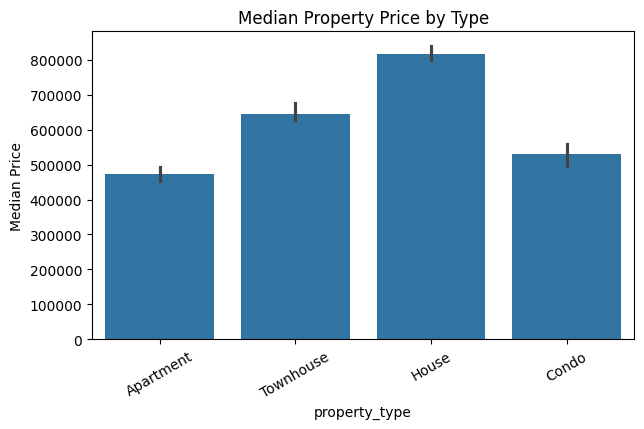

In [11]:
#Price distribution by property type (bar using median)
plt.figure(figsize=(7,4))
sns.barplot(
    x="property_type",
    y="price",
    data=df,
    estimator=np.median
)
plt.title("Median Property Price by Type")
plt.ylabel("Median Price")
plt.xticks(rotation=30)
plt.show()

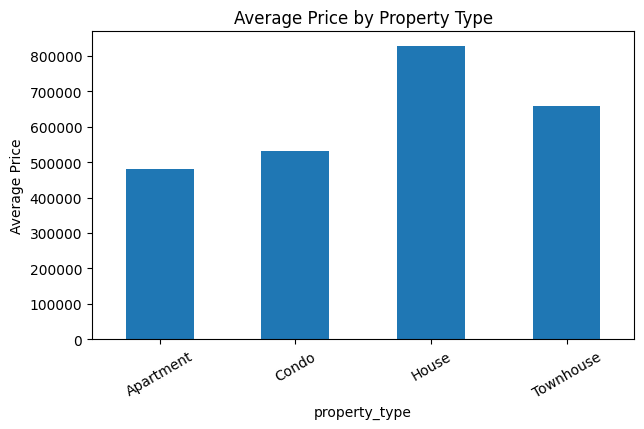

In [12]:
#Average feature comparison
feature_means = df.groupby("property_type").mean(numeric_only=True)

feature_means["price"].plot(
    kind="bar",
    figsize=(7,4)
)
plt.title("Average Price by Property Type")
plt.ylabel("Average Price")
plt.xticks(rotation=30)
plt.show()

In [13]:
#Split features and target
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)

In [14]:
#Numeric features
numeric_features = [
    "area",
    "bedrooms",
    "bathrooms",
    "age",
    "location_score",
    "amenities_count"
]

scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [15]:
#Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
#Predictions
y_pred = model.predict(X_test)

#Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 5995033423.014589
R2 Score: 0.8341259124282953


In [19]:
#Create price categories
bins = [0, 300000, 600000, np.inf]
labels = ["Low", "Medium", "High"]

y_test_cat = pd.cut(y_test, bins=bins, labels=labels)
y_pred_cat = pd.cut(y_pred, bins=bins, labels=labels)

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_cat, y_pred_cat, labels=labels)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[  6   3   0]
 [  3  87  22]
 [  0  17 112]]


In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_cat, y_pred_cat, labels=labels)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[  6   3   0]
 [  3  87  22]
 [  0  17 112]]


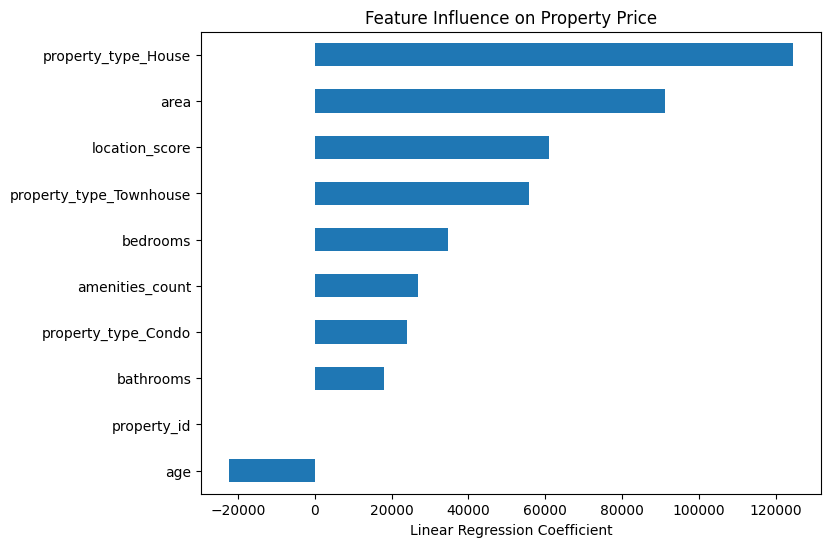

In [22]:
#Feature coefficients
coefficients = pd.Series(
    model.coef_,
    index=X_train.columns
).sort_values()

coefficients.plot(kind="barh", figsize=(8,6))
plt.title("Feature Influence on Property Price")
plt.xlabel("Linear Regression Coefficient")
plt.show()